In [111]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# method 1 to visualize decision tree
from sklearn.tree import export_graphviz

# method 2 to visualize decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [112]:
# load data
df = pd.read_excel("air_foil.xlsx")

In [113]:
#Check the column labels 
df.columns

Index([' Frequency', ' Angle_of_attack', ' Chord_length',
       ' Free_stream_velocity', 'Suction_side_displacement_thickness',
       'sound_pressure_level'],
      dtype='object')

In [114]:
#check for null values 
df.isna().sum()

 Frequency                             0
 Angle_of_attack                       0
 Chord_length                          0
 Free_stream_velocity                  0
Suction_side_displacement_thickness    0
sound_pressure_level                   0
dtype: int64

In [115]:
# divide data into features and labels 
X=df[[' Frequency', ' Angle_of_attack', ' Chord_length',
       ' Free_stream_velocity', 'Suction_side_displacement_thickness']]
y=df.sound_pressure_level

In [116]:
#check features 
X

,Frequency,Angle_of_attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


In [117]:
# check labels 
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: sound_pressure_level, Length: 1503, dtype: float64

In [118]:
# creating a decision tree regressor with random state 0
regression =DecisionTreeRegressor(random_state=0)

In [119]:
#In the code model=regression.fit(X, y), a DecisionTreeRegressor model is created and trained on a dataset consisting of input features X and target values y.
model=regression.fit(X,y)

In [120]:
pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})

,features,importance
0,Frequency,0.391944
1,Angle_of_attack,0.051075
2,Chord_length,0.101228
3,Free_stream_velocity,0.042219
4,Suction_side_displacement_thickness,0.413534


In [121]:
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(model, out_file ='tree.dot',
feature_names = [' Frequency', ' Angle_of_attack', ' Chord_length',
       ' Free_stream_velocity', 'Suction_side_displacement_thickness'])

In [122]:
# method 1 to visualize decision tree

In [123]:
# tree is exported to a word compatible .dot file. Open in MS Word. Copy the full structure.
# go to http://www.webgraphviz.com/ 
# paste in the textbox and click generate

In [124]:
# method 2 to visualize decision tree

[Text(0.5, 0.875, ' Frequency <= 3575.0\nsquared_error = 47.56\nsamples = 1503\nvalue = 124.836'),
 Text(0.25, 0.625, 'Suction_side_displacement_thickness <= 0.016\nsquared_error = 32.08\nsamples = 1079\nvalue = 126.57'),
 Text(0.125, 0.375, ' Chord_length <= 0.127\nsquared_error = 22.209\nsamples = 769\nvalue = 127.85'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Suction_side_displacement_thickness <= 0.051\nsquared_error = 42.399\nsamples = 310\nvalue = 123.392'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Suction_side_displacement_thickness <= 0.002\nsquared_error = 59.842\nsamples = 424\nvalue = 120.424'),
 Text(0.625, 0.375, ' Frequency <= 7150.0\nsquared_error = 31.041\nsamples = 112\nvalue = 129.412'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Suction_side_displacement_thickness <= 0.035\nsquared_error = 30.775\ns

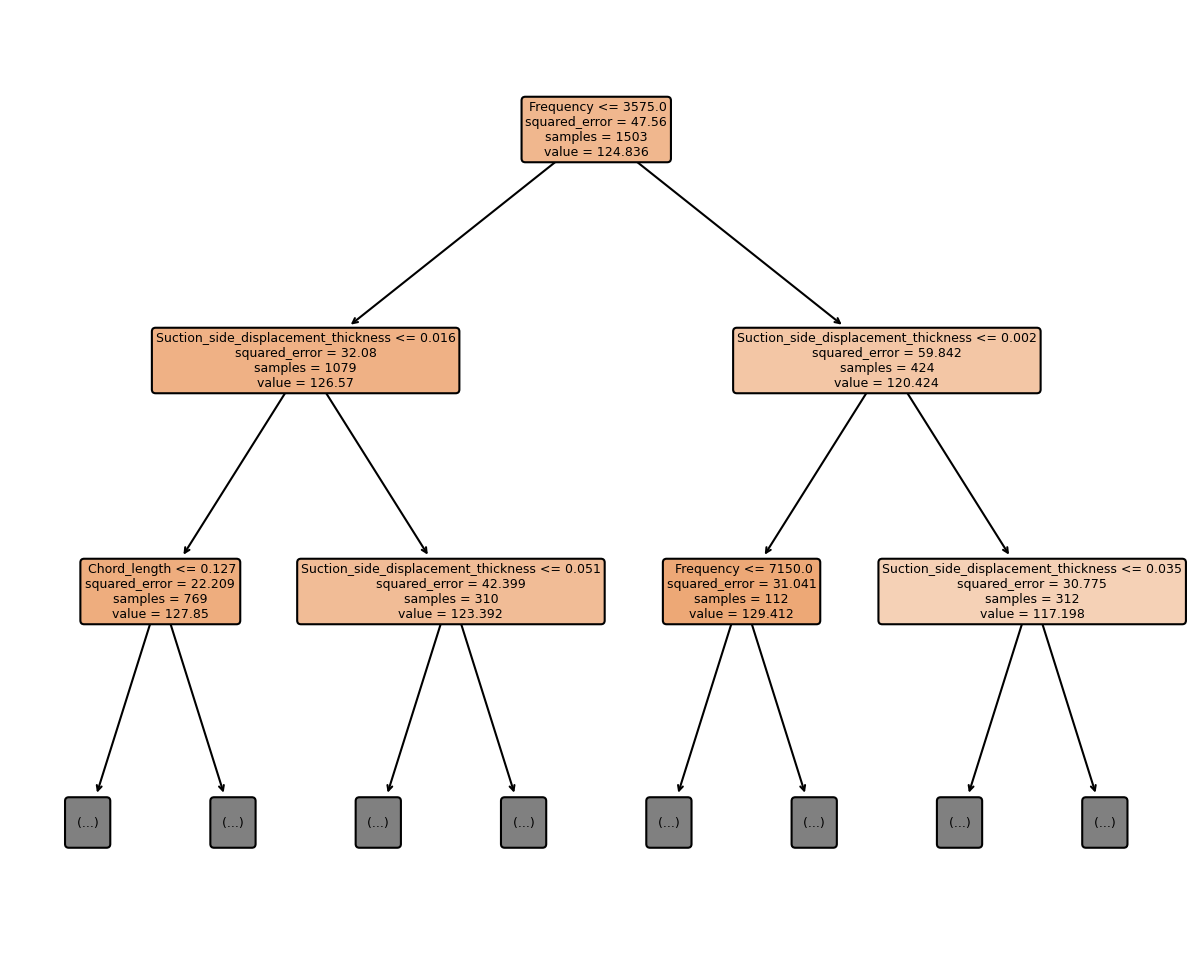

In [125]:
plt.figure(figsize=(10, 8),dpi=150)
plot_tree(model, feature_names=X.columns, max_depth=2,filled=True, rounded=True,fontsize=6)


In [126]:
from sklearn.model_selection import cross_val_score

# Create a range of possible depths to test
depths = range(1, 10)

# Use cross-validation to test each depth
cv_scores = []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=0)
    scores = cross_val_score(model, X, y, cv=5)
    cv_scores.append(scores.mean())

# Find the optimal depth that gives the highest cross-validation score
optimal_depth = depths[cv_scores.index(max(cv_scores))]
optimal_depth


7

In [145]:
# split data into train and test 
from sklearn.model_selection import train_test_split

# split data into train and test in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The above code will split the data into 80% training and 20% testing datasets.
# The 'random_state' parameter ensures that the random splitting is reproducible.


In [146]:
X_train.shape



(1202, 5)

In [147]:
X_test.shape

(301, 5)

In [148]:
y_train.shape

(1202,)

In [149]:
y_test.shape


(301,)

In [150]:
X_train.head()

,Frequency,Angle_of_attack,Chord_length,Free_stream_velocity,Suction_side_displacement_thickness
1058,800,9.5,0.0254,71.3,0.004207
408,315,7.3,0.2286,55.5,0.011171
703,2000,12.6,0.1524,71.3,0.048316
1279,8000,0.0,0.1016,39.6,0.001463
140,6300,3.0,0.3048,39.6,0.004957


In [151]:
regression =DecisionTreeRegressor(random_state=0,max_depth=7)

In [152]:
model=regression.fit(X_train,y_train)

In [153]:
pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})

,features,importance
0,Frequency,0.372104
1,Angle_of_attack,0.034422
2,Chord_length,0.090146
3,Free_stream_velocity,0.023345
4,Suction_side_displacement_thickness,0.479984


In [154]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model and fit it to the training data
regression =DecisionTreeRegressor(random_state=0,max_depth=7)
regression.fit(X_train, y_train)

# Predict on the train set
y_pred = regression.predict(X_train)

# Calculate mean squared error
mse = mean_squared_error(y_train, y_pred)

# Print the MSE
print("Mean squared error: {:.2f}".format(mse))


Mean squared error: 7.75


In [155]:
# Predict on the test set
y_pred = regression.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print("Mean squared error: {:.2f}".format(mse))

Mean squared error: 10.24


In [ ]:
# both train and test mse are consistent
